# Графический анализ

- [2D Graphs](#2D)
- [3D Graphs](#3D)


---

## 2D Graphs <a id="2D"></a>

**2D Histograms** являются графическими представлениями распределения частот выбранных переменных.

**2D Histograms Regular** (простые) – столбчатая диаграмма распределения частот.

На рисунке ниже представлена гистограмма распределения итогового балла. Из гистограммы видно, что чаще всего встречаются учащиеся, которые набрали от *65* до *70* баллов на экзамене.

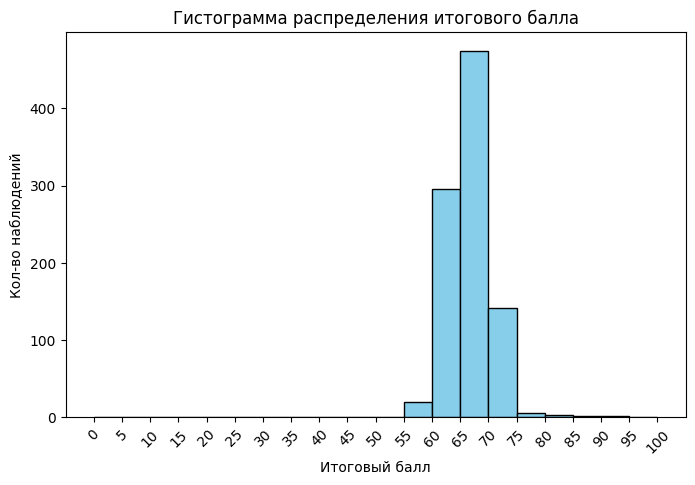

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/student_perfomance_sample.csv")

bins = np.arange(0, 105, 5)
count = pd.cut(df["final_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1], count.values, width=5, align="edge", edgecolor="black", color="skyblue")
plt.xticks(bins, rotation=45)
plt.xlabel("Итоговый балл")
plt.ylabel("Кол-во наблюдений")
plt.title("Гистограмма распределения итогового балла")
plt.show()

**2D Histograms Multiple** (составные) – изображают распределение частот для нескольких переменных на одном графике.

На рисунке ниже представлена гистограмма распределения итогового балла и результата предыдущего экзамена с отрезками длины 10, начало первого отрезка – 40, конец последнего – 100. Из гистограммы видно, что при заданных границах интервалов больше всего встречаются учащиеся с итоговым баллом и результатом предыдущего экзамена в интервале [60; 70].

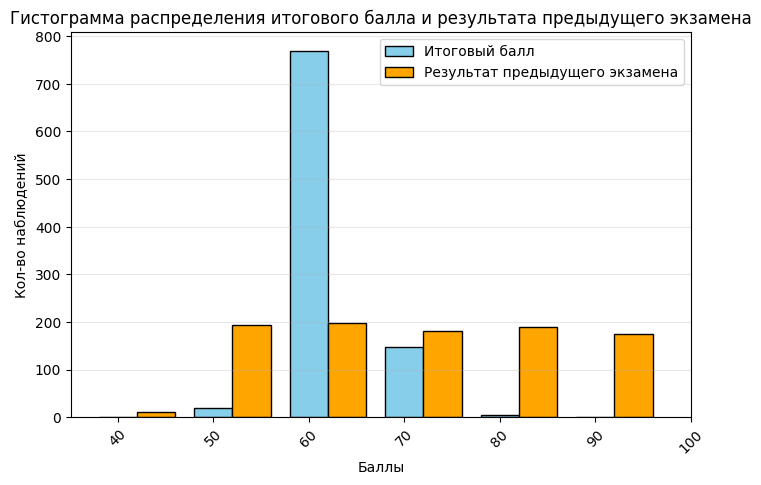

In [90]:
bins = np.arange(40, 110, 10)

final_exam_score_counts = pd.cut(df["final_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()
prev_exam_score_counts = pd.cut(df["prev_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1]-2, final_exam_score_counts, width=4, align="edge", color="skyblue", edgecolor="black", label="Итоговый балл")
plt.bar(bins[:-1]+2, prev_exam_score_counts, width=4, align="edge", color="orange", edgecolor="black", label="Результат предыдущего экзамена")
plt.xticks(bins, rotation=45)
plt.xlabel("Баллы")
plt.ylabel("Кол-во наблюдений")
plt.title("Гистограмма распределения итогового балла и результата предыдущего экзамена")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

**2D Histograms Double-Y** (с двойной осью Y) – комбинация двух по-разному масштабированных составных гистограмм.

На рисунке ниже построена гистограмма по двум разномасштабным переменным: среднее количество часов сна в сутки и среднее количество часов, потраченных в неделю на учебу. Из гистограммы видно, что чаще всего встречаются учащиеся со средним количеством часов сна в сутки от 5 до 10 (большинство значений попали в интервал) и со средним количеством часов, потраченных в неделю на учебу от 15 до 25 (так как количество наблюдений в интервалах [15;20] и [20;25] примерно равны).

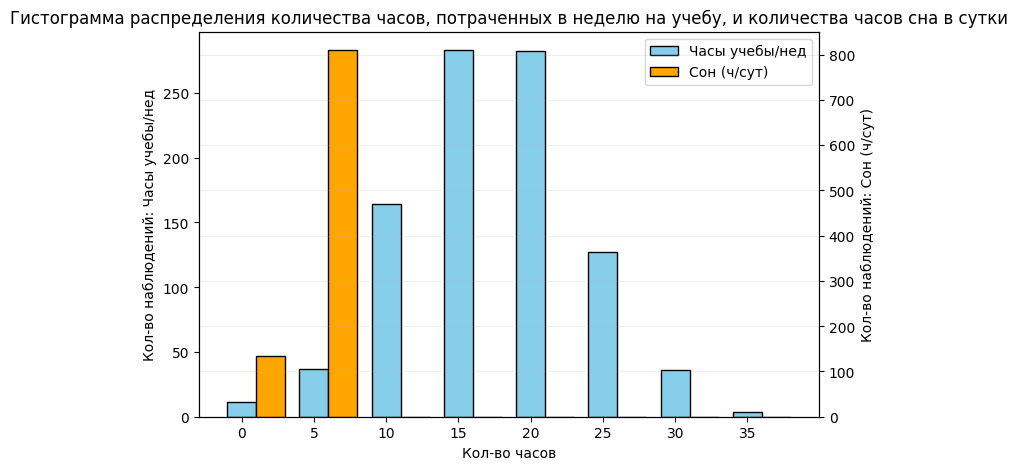

In [91]:
bins = np.arange(0, 45, 5)

study_counts = pd.cut(df["study_hours_week"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()
sleep_counts = pd.cut(df["sleep_hours"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(bins[:-1]-1, study_counts.values, width=2, align="edge", color="skyblue", edgecolor="black", label="Часы учебы/нед")
ax1.set_xlabel("Кол-во часов")
ax1.set_ylabel("Кол-во наблюдений: Часы учебы/нед")

ax2 = ax1.twinx()
ax2.bar(bins[:-1]+1, sleep_counts.values, width=2, align="edge", color="orange", edgecolor="black", label="Сон (ч/сут)")
ax2.set_ylabel("Кол-во наблюдений: Сон (ч/сут)")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")
plt.title("Гистограмма распределения количества часов, потраченных в неделю на учебу, и количества часов сна в сутки")
ax2.grid(alpha=0.2)
plt.show()

**2D Scatterplots** (диаграммы рассеяния) визуализируют зависимость между двумя переменными.

**2D Scatterplots Regular** (простые) - визуализируют зависимость между двумя переменными X и Y.

На рисунке ниже изображена диаграмма, отображающая зависимости между количеством часов, потраченных в неделю на учебу, и итоговым баллом. Из диаграммы и по коэффициенту корреляции r видно, что проявляется умеренная взаимосвязь между этими переменными (с ростом количества часов растет и итоговый балл).

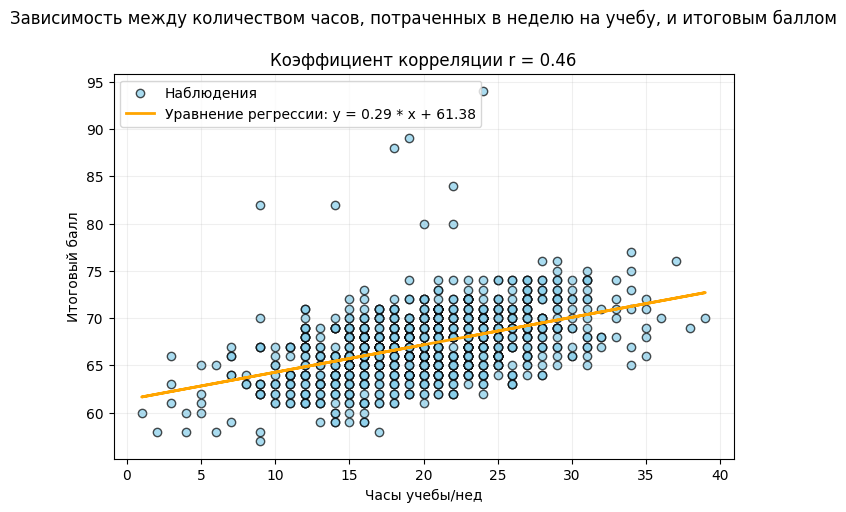

In [92]:
from scipy.stats import linregress

x = df["study_hours_week"]
y = df["final_exam_score"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="skyblue", edgecolor="black", alpha=0.7, label="Наблюдения")
plt.plot(x, line, color="orange", linewidth=2, label=f"Уравнение регрессии: y = {slope:.2f} * x + {intercept:.2f}")
plt.xlabel("Часы учебы/нед")
plt.ylabel("Итоговый балл")
plt.title(f"Зависимость между количеством часов, потраченных в неделю на учебу, и итоговым баллом\n\nКоэффициент корреляции r = {r_value:.2f}")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

**2D Scatterplots Multiple** (составные) – состоит из нескольких зависимостей и изображает несколько взаимосвязей.

На рисунке ниже изображена диаграмма, отображающая зависимости между итоговым баллов и средним количеством часов сна, а также между итоговым баллом и средним количеством часов физической активности.

Из построенных графиков можно выделить следующую закономерность: чем больше учащийся набирает баллов на экзамене, тем меньше у него сна и физической активности.

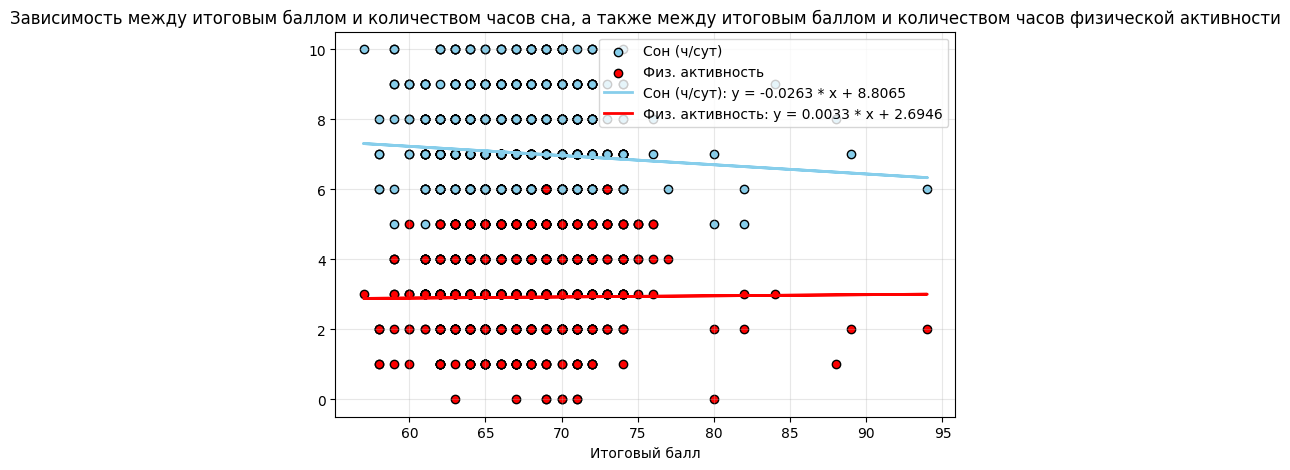

In [93]:
x = df["final_exam_score"]
y_sleep = df["sleep_hours"]
y_active = df["physical_activity_hours"]

slope_s, intercept_s, r_s, p_s, std_s = linregress(x, y_sleep)
line_sleep = slope_s * x + intercept_s
slope_a, intercept_a, r_a, p_a, std_a = linregress(x, y_active)
line_active = slope_a * x + intercept_a

plt.figure(figsize=(8, 5))
plt.scatter(x, y_sleep, color="skyblue", edgecolor = "black", label="Сон (ч/сут)")
plt.scatter(x, y_active, color="red", edgecolor = "black", label="Физ. активность")

plt.plot(x, line_sleep, color="skyblue", linewidth=2, label=f"Сон (ч/сут): y = {slope_s:.4f} * x + {intercept_s:.4f}")
plt.plot(x, line_active, color="red", linewidth=2, label=f"Физ. активность: y = {slope_a:.4f} * x + {intercept_a:.4f}")

plt.xlabel("Итоговый балл")
plt.title("Зависимость между итоговым баллом и количеством часов сна, а также между итоговым баллом и количеством часов физической активности")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

**2D Scatterplots Double-Y** (с двойной осью Y) – комбинация двух составных диаграмм рассеяния для одной переменной X и двух различных наборов переменных Y.

На рисунке ниже изображена диаграмма – комбинация двух составных диаграмм: первая зависимость между итоговым баллом и занятиями с репетитором, вторая зависимость между итоговым баллом и процентом посещения занятий.

Из диаграммы можно заметить, что чем больше учащийся набирает баллов на экзамене, тем меньше он посещает занятия с репетитором и больше посещает учебных занятий. 

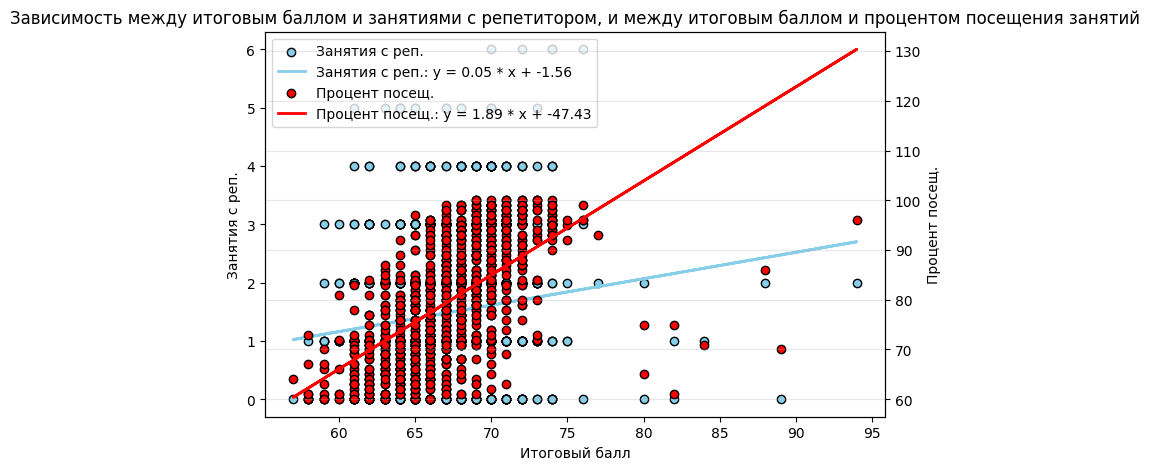

In [94]:
x = df["final_exam_score"]
y_tutor = df["tutoring_sessions_month"]      
y_attend = df["attendance_pct"]               

slope_t, intercept_t, r_t, _, _ = linregress(x, y_tutor)
line_tutor = slope_t * x + intercept_t
slope_a, intercept_a, r_a, _, _ = linregress(x, y_attend)
line_attend = slope_a * x + intercept_a

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.scatter(x, y_tutor, color="skyblue", edgecolor = "black", label="Занятия с реп.")
ax1.plot(x, line_tutor, color="skyblue", linewidth=2, label=f"Занятия с реп.: y = {slope_t:.2f} * x + {intercept_t:.2f}")
ax1.set_xlabel("Итоговый балл")
ax1.set_ylabel("Занятия с реп.")

ax2 = ax1.twinx()
ax2.scatter(x, y_attend, color="red", edgecolor = "black", label="Процент посещ.")
ax2.plot(x, line_attend, color="red", linewidth=2, label=f"Процент посещ.: y = {slope_a:.2f} * x + {intercept_a:.2f}")
ax2.set_ylabel("Процент посещ.")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
plt.title("Зависимость между итоговым баллом и занятиями с репетитором, и между итоговым баллом и процентом посещения занятий")
plt.grid(alpha=0.3)
plt.show()

**2D Scatterplots Quartile** (квантилей) – показывает зависимость между квантилями двух переменных, позволяющая оценить сходство эмпирических распределений.

На рисунке ниже изображена зависимость между квантилями числа часов, потраченных на учебу, и итогового балла.

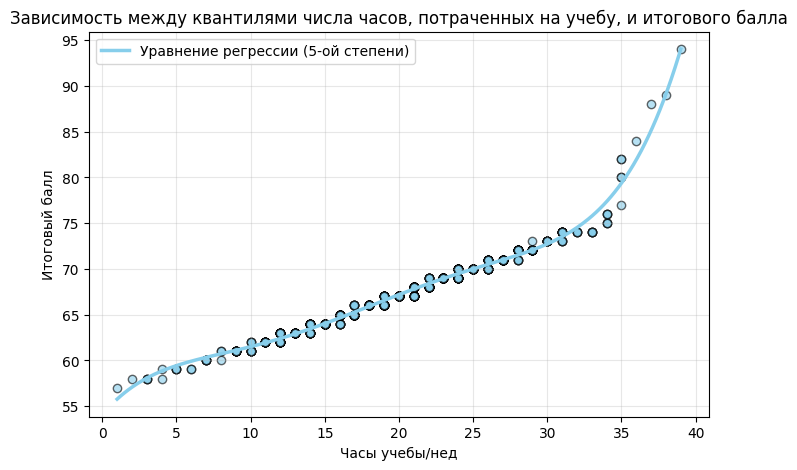

In [95]:
x = np.sort(df["study_hours_week"].values)
y = np.sort(df["final_exam_score"].values)

coeffs = np.polyfit(x, y, 5)
poly = np.poly1d(coeffs)

x_line = np.linspace(x.min(), x.max(), 300)
y_line = poly(x_line)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, edgecolor="black",color="skyblue")
plt.plot(x_line, y_line, linewidth=2.5, color="skyblue", label=f"Уравнение регрессии (5-ой степени)")
plt.xlabel("Часы учебы/нед")
plt.ylabel("Итоговый балл")
plt.title("Зависимость между квантилями числа часов, потраченных на учебу, и итогового балла")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**2D Pie Chart–Counts** (круговая диаграмма частот), относительные частоты категориальной переменной будут изображены в виде круговых секторов размеров, пропорциональным относительным частотам.

На рисунке ниже представлена круговая диаграмма частот, показывающая соотношения количества государственных и частных школ.

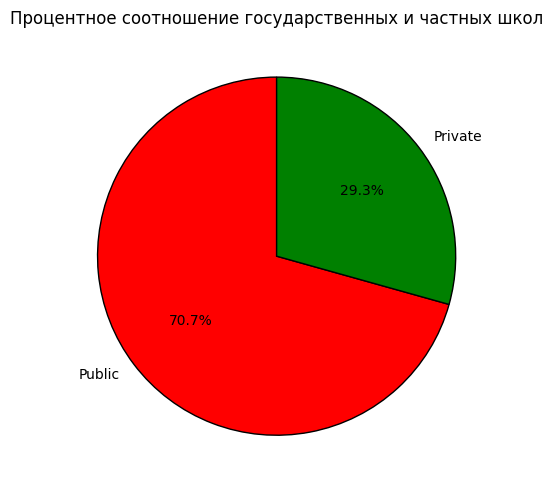

In [96]:
counts = df["school_type"].value_counts()
colors = ["red", "green"]

plt.figure(figsize=(8, 5))
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Процентное соотношение государственных и частных школ")
plt.tight_layout()
plt.show()

**2D Box Plots** (диаграммы размаха) – на этих диаграммах изображаются диапазоны или характеристики распределения значений выбранной переменной отдельно по группам, заданным категориальной переменной.

На рисунке ниже представлены характеристики распределения значений переменной итоговый балл по группам пола.

Из построенной диаграммы видно, что у учащихся мужского пола итоговый балл на экзамене в среднем равен итоговому баллу на экзамене у учащихся женского пола, а разброс баллов немного выше у учащихся мужского пола.


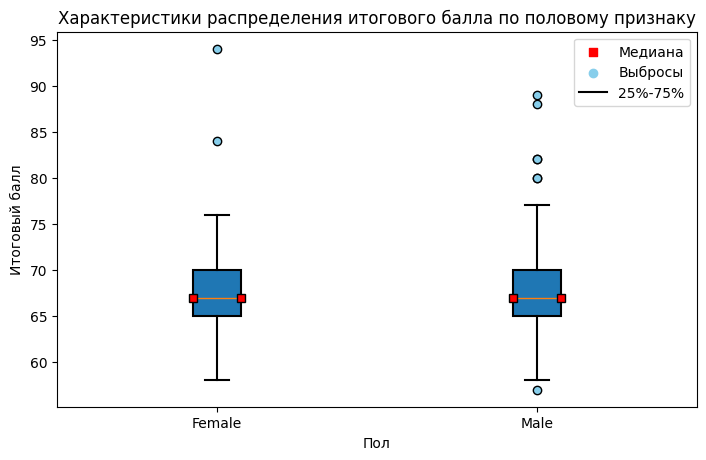

In [97]:
boxprops = dict(linewidth=1.5, color="black")
whiskerprops = dict(linewidth=1.5, color="black")
capprops = dict(linewidth=1.5, color="black")
medianprops = dict(marker="s", markersize=6, markerfacecolor="red", markeredgecolor="black")
flierprops = dict(marker='o', markersize=6, markerfacecolor="skyblue", markeredgecolor="black", linestyle="none")

bp = df.boxplot(column="final_exam_score", by="gender", figsize=(8, 5), grid=False, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops, patch_artist=True)
plt.title("Характеристики распределения итогового балла по половому признаку")
plt.suptitle("")
plt.xlabel("Пол")
plt.ylabel("Итоговый балл")
plt.scatter([], [], marker='s', color='red', label='Медиана')
plt.scatter([], [], marker='o', color='skyblue', label='Выбросы')
plt.plot([], [], color="black", label="25%-75%")
plt.legend(loc="upper right")
plt.show()

На рисунке ниже на **2D Box Plots Multiple** диаграмме представлены характеристики распределения значений переменных итоговый балл и результат предыдущего экзамена по типу школы.

Из построенной диаграммы видно, что разброс итогового балла у учащихся государственных школ немного выше, чем у частных, а результат предыдущего экзамена в среднем немного выше у учащихся частных школ.

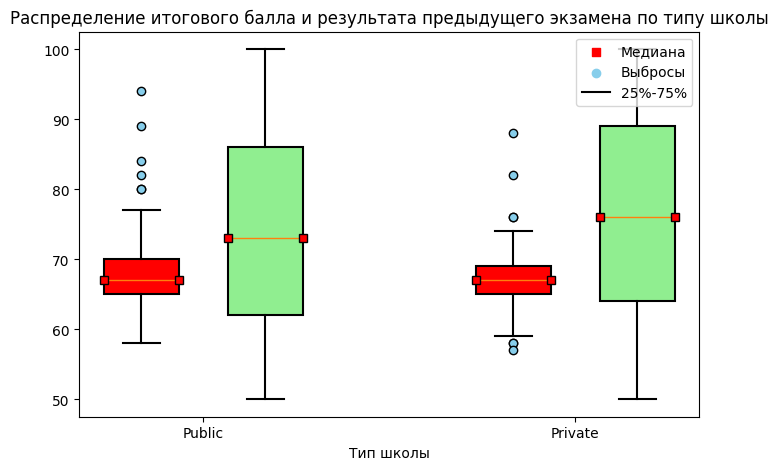

In [98]:
variables = ["final_exam_score", "prev_exam_score"]
colors = ["red", "lightgreen"]

plt.figure(figsize=(8,5))
boxprops = dict(linewidth=1.5, color="black")
whiskerprops = dict(linewidth=1.5, color="black")
capprops = dict(linewidth=1.5, color="black")
medianprops = dict(marker="s", markersize=6, markerfacecolor="red", markeredgecolor="black")
flierprops = dict(marker='o', markersize=6, markerfacecolor="skyblue", markeredgecolor="black", linestyle="none")

groups = df["school_type"].unique()
positions = []
pos = 1
for _ in groups:
    positions.extend([pos, pos+1])
    pos += 3
    
data_ordered = []
for g in groups:
    for var in variables:
        data_ordered.append(df[df["school_type"]==g][var])

b = plt.boxplot(data_ordered, positions=positions, widths=0.6, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)
for i, patch in enumerate(b['boxes']):
    patch.set_facecolor(colors[i % 2])

xticks_pos = [(positions[i*2] + positions[i*2+1])/2 for i in range(len(groups))]
plt.xticks(xticks_pos, groups)
plt.xlabel("Тип школы")
plt.title("Распределение итогового балла и результата предыдущего экзамена по типу школы")
plt.scatter([], [], marker='s', color='red', label='Медиана')
plt.scatter([], [], marker='o', color='skyblue', label='Выбросы')
plt.plot([], [], color="black", label="25%-75%")
plt.legend(loc="upper right")
plt.show()

## 3D Graphs <a id="3D"></a>

**3D Bivariate Histograms**.
Эти гистограммы можно рассматривать как сочетание двух простых гистограмм, соединённых так, чтобы можно было исследовать частоты совместного появления значений двух переменных.

На рисунке ниже показано совместное распределение частот часов, потраченных на учебу, и количества часов сна.

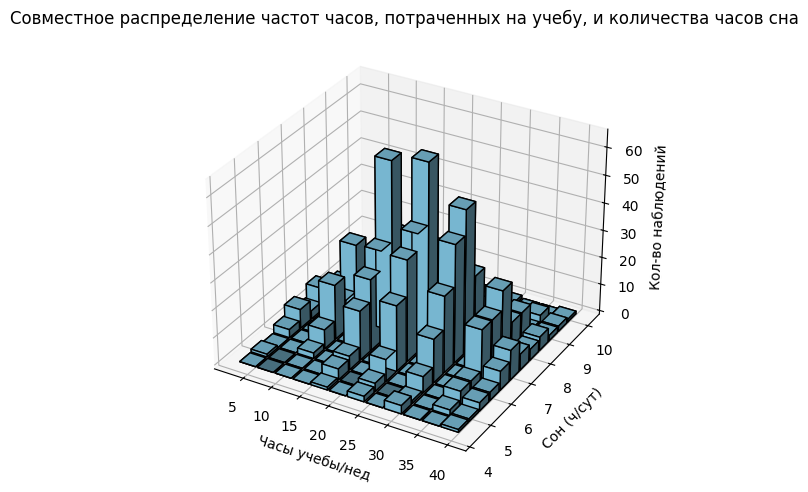

In [104]:
from mpl_toolkits.mplot3d import Axes3D

x = df["study_hours_week"]
y = df["sleep_hours"]

bins = 12
hist, xedges, yedges = np.histogram2d(x, y, bins=bins)
xpos, ypos = np.meshgrid((xedges[:-1] + xedges[1:]) / 2, (yedges[:-1] + yedges[1:]) / 2,)
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = hist.ravel()
dx = (xedges[1] - xedges[0]) * 0.9
dy = (yedges[1] - yedges[0]) * 0.9

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")
ax.set_xlabel("Часы учебы/нед")
ax.set_ylabel("Сон (ч/сут)")
ax.set_zlabel("Кол-во наблюдений")
ax.set_title("Совместное распределение частот часов, потраченных на учебу, и количества часов сна")
plt.tight_layout()
plt.show()

**3D Box Plots** - это диаграммы размаха.

На рисунке ниже продемонстрирована диаграмма размаха для итогового балла и результата предыдущего экзамена по группам пола.

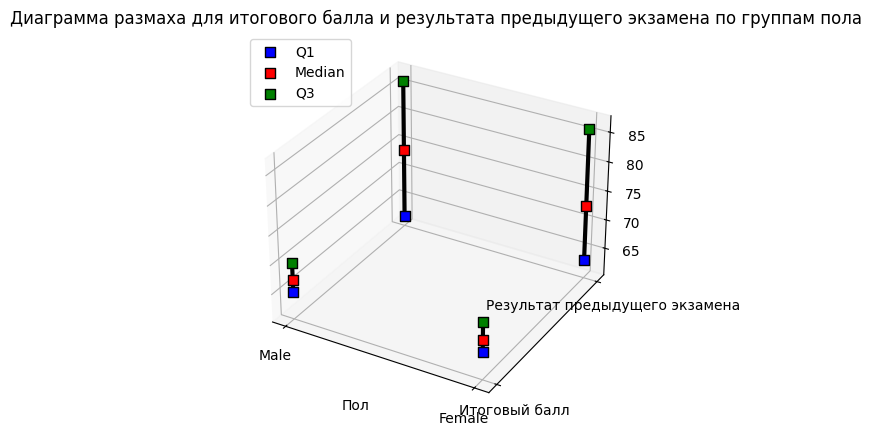

In [162]:
groups = ["Male", "Female"]
variables = ["final_exam_score", "prev_exam_score"]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
line_width = 3
marker_size = 60

for gx, gender in enumerate(groups):
    for vy, var in enumerate(variables):
        data = df[df["gender"] == gender][var].dropna()
        q1 = np.percentile(data, 25)
        median = np.percentile(data, 50)
        q3 = np.percentile(data, 75)
        x = gx              
        y = vy               
        ax.plot([x, x], [y, y], [q1, q3], color="black", linewidth=line_width)
        ax.scatter(x, y, q1,  marker="s", s=marker_size, color="blue",  edgecolors="black", label="Q1" if gx==vy==0 else "")
        ax.scatter(x, y, median, marker="s", s=marker_size, color="red",   edgecolors="black", label="Median" if gx==vy==0 else "")
        ax.scatter(x, y, q3,  marker="s", s=marker_size, color="green", edgecolors="black", label="Q3" if gx==vy==0 else "")

ax.set_xticks([0, 1])
plt.xlabel("Пол")
ax.set_xticklabels(groups)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Итоговый балл", "Результат предыдущего экзамена"])
ax.set_title("Диаграмма размаха для итогового балла и результата предыдущего экзамена по группам пола")
ax.legend(loc="upper left")
plt.show()